0


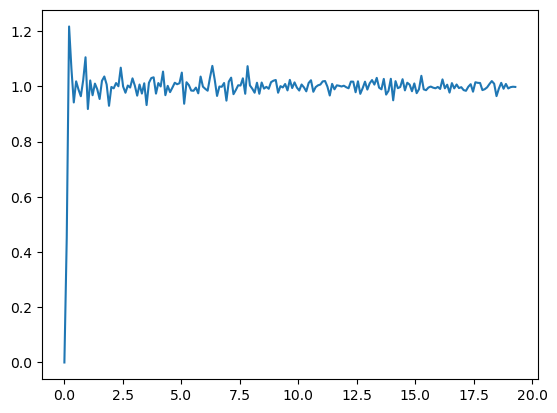

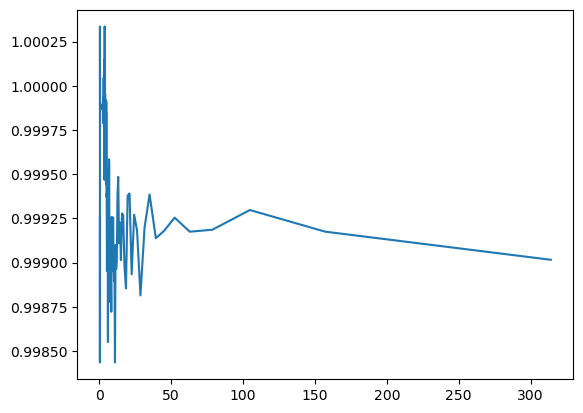

1


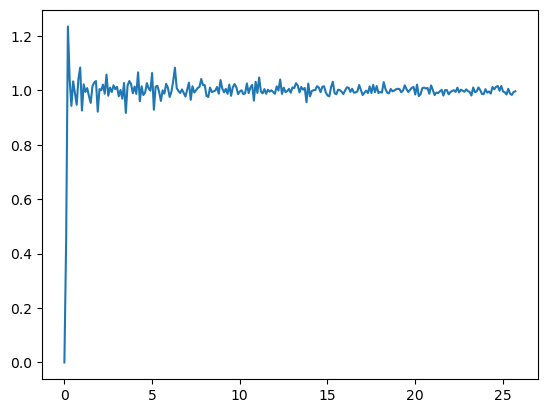

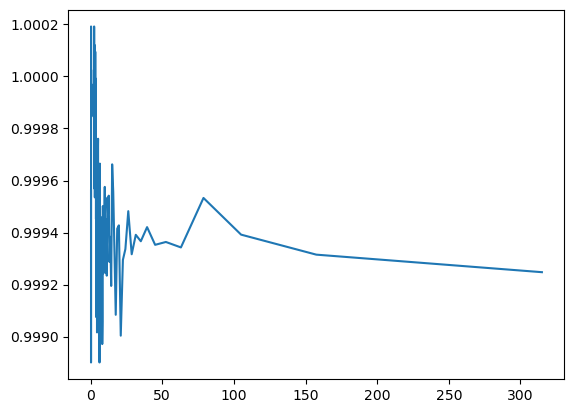

2


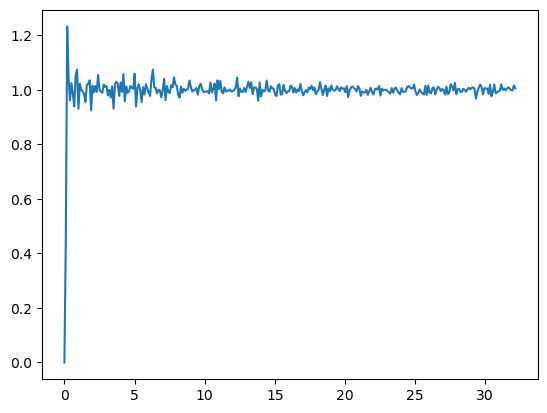

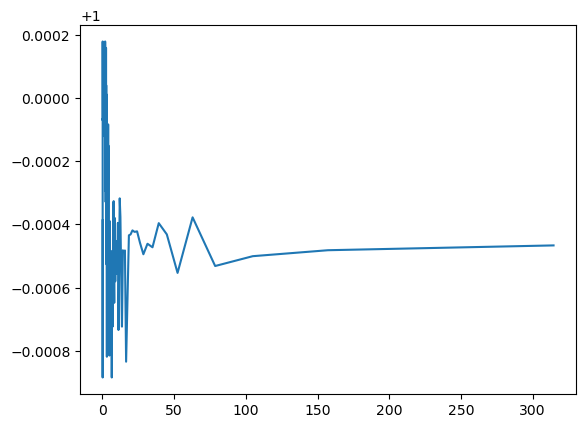

3


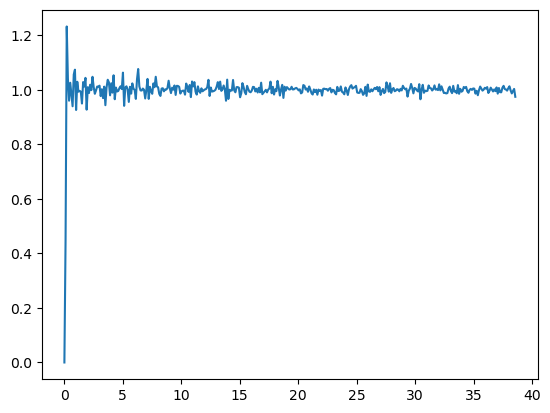

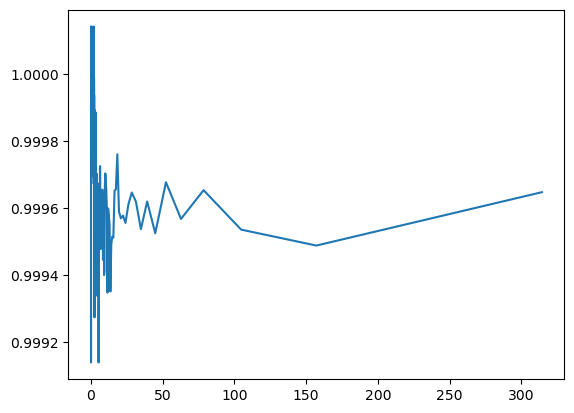

4


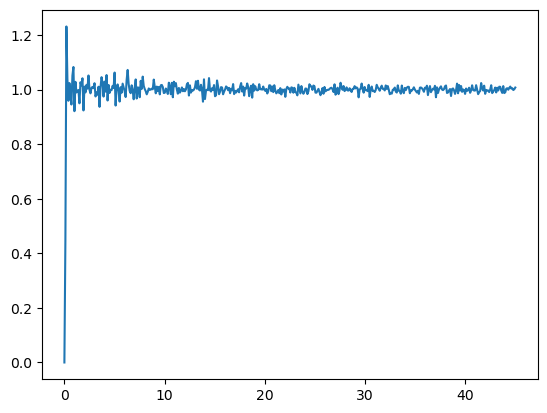

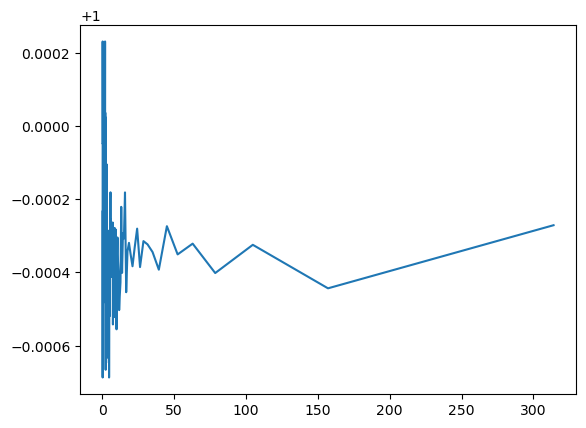

5


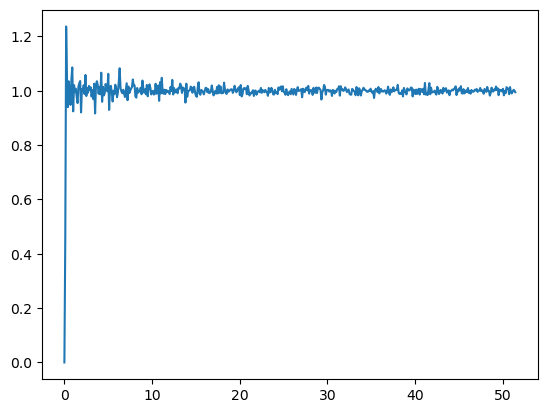

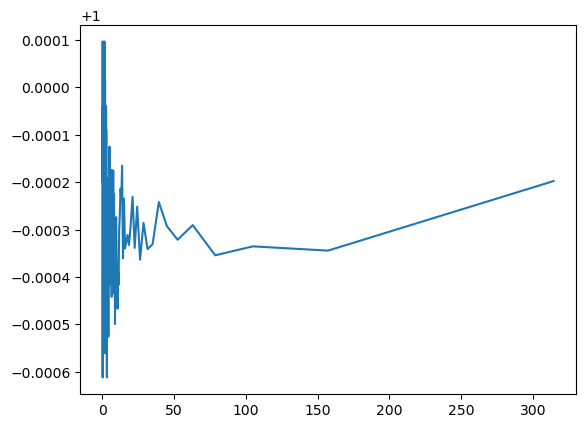

6


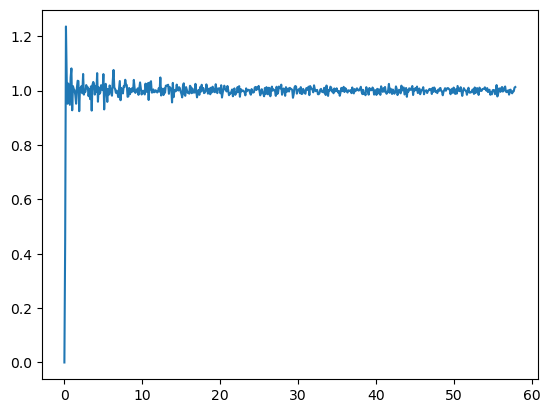

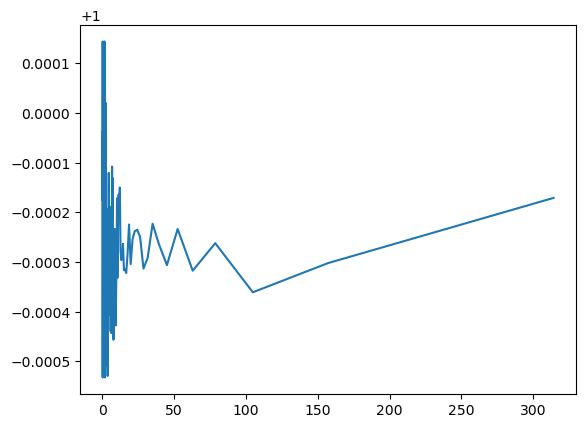

7


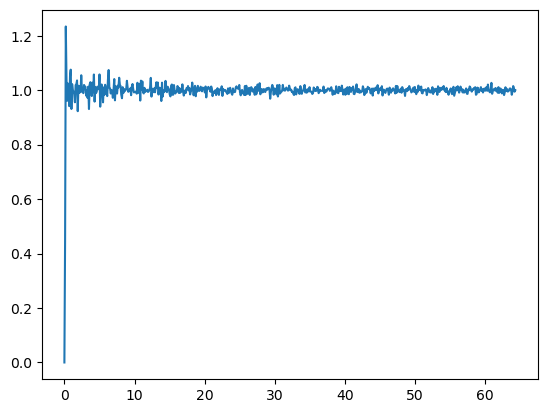

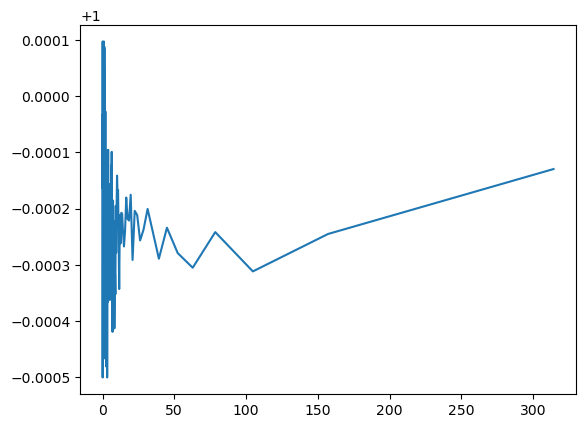

8


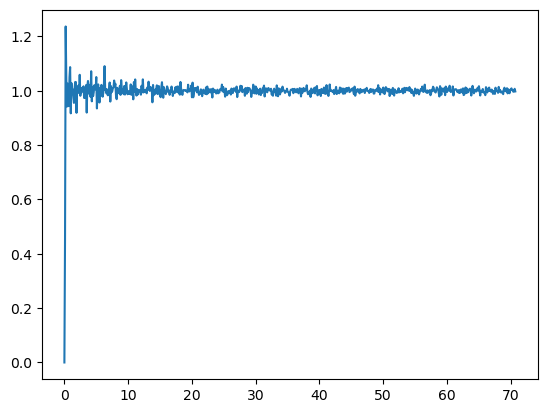

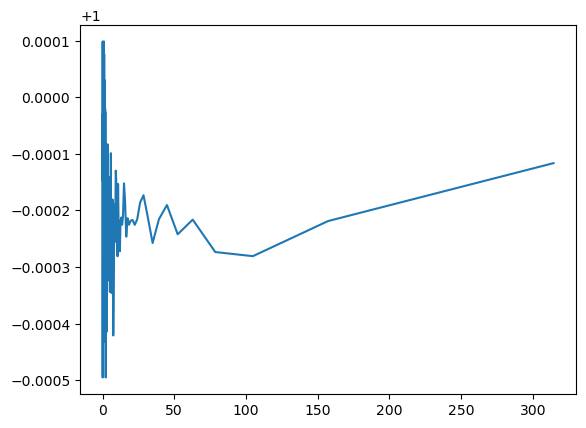

9


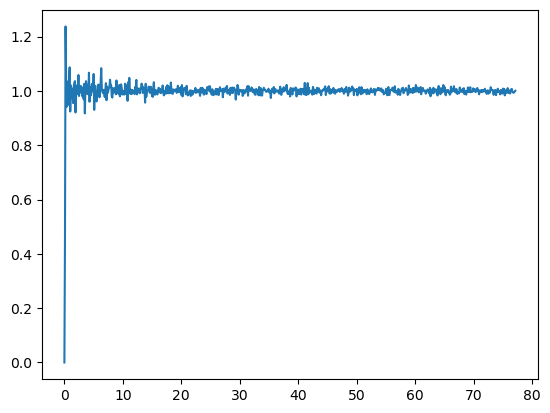

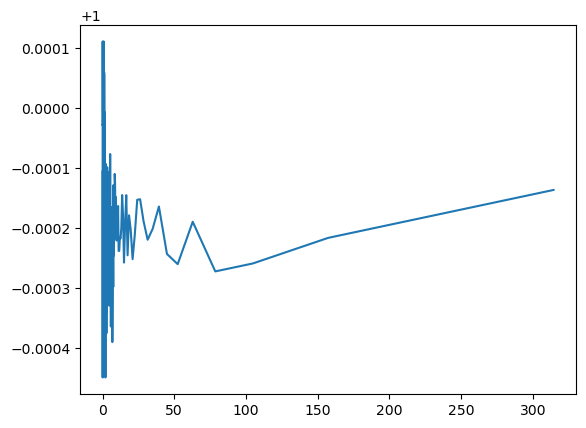

Text(0, 0.5, 'variances_squqared')

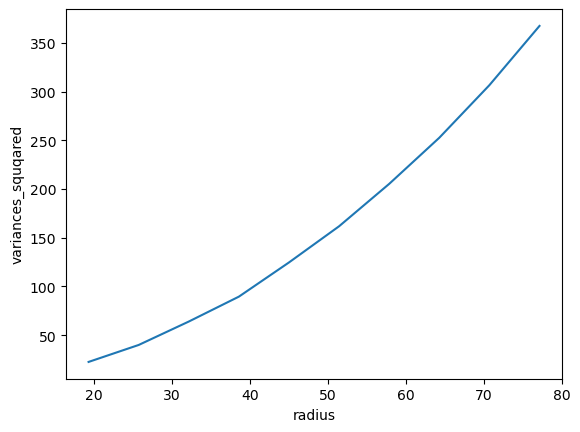

In [3]:
import calc
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(calc)
from calc import Hyperuniform_helper
        
file_name = f'data/positions/positions_1.txt'
data = np.loadtxt(file_name)
rho, box_length, volume_fraction = data[0]
radius = np.linspace(box_length/8, box_length/2,10)
scaled_variances = np.zeros(len(radius))
helper = Hyperuniform_helper(radius[0], np.zeros(3), data[1:,], rho)
r = None
for i in range(len(radius)):
    print(i)
    helper.set_radius(radius[i])
    all_gr = []
    for j in range(2000):
        file_name = f'data/positions/positions_{j}.txt'
        data = np.loadtxt(file_name)
        helper.set_positions(data[1:])
        r, gr = helper.calculate_radial_distribution(int(radius[i]/0.1), 2)
        all_gr.append(gr)
    avg_gr = np.mean(all_gr, axis=0)
    plt.plot(r, avg_gr)
    plt.show()
    r_fit, g_fit = helper.g_fit(r, avg_gr)
    k_values = np.sort(2*np.pi/r_fit[1:])
    sk = helper.Fourier_transform_2d(g_fit[1:])
    plt.plot(k_values, sk)
    plt.show()
    variance_square = helper.variance_calculations_in_reciprocal_space_2d(sk, k_values)
    scaled_variances[i] = variance_square

plt.plot(radius, scaled_variances)
plt.xlabel("radius")
plt.ylabel("variances_squqared")

In [45]:
print(scaled_variances)

[ 22.02700408  38.55154691  62.48235513  90.20125227 128.70908438
 172.73472807 225.23142197 286.51795376 356.47757089 426.33545031]


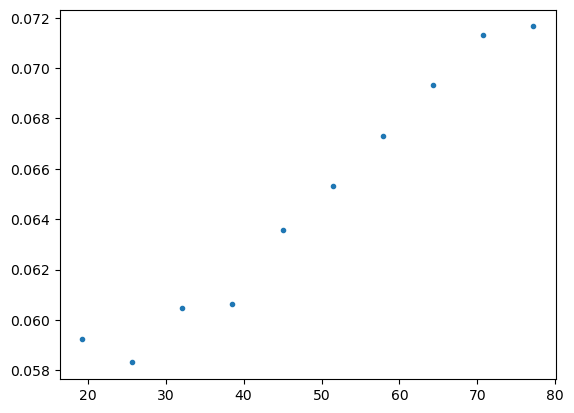

In [46]:
indexes= scaled_variances>0
variances_radius_ratio = (scaled_variances[indexes])/(radius[indexes])**2
plt.plot(radius[indexes], variances_radius_ratio, '.')